# Lecture 14: July 24th, 2024

__Announcements:__
* Yasmeen student hours rescheduled to 4:00pm-5:00pm on Thursday 7/25.

__Today:__
* Details about final creative project
* Finish image processing unit
* Bonus: Making the square grid
* Student hours – depending on how much time is left

__Friday:__
* Would you rather have:
    * Bonus material on OOP
    * Student hours
    * Do both – this is the winner!

## Unique Colors

How many unique colors does this image have? Where do the colors change from dark pink to light pink?

Looking at this image, you'd guess that it has exactly three unique colors. You'd be right. __But,__ I'd never expect this to be true of an image that I've found in the wild. I coded this image myself, so I made sure that it had exactly three colors. Some things that can contribute to more than three colors:

* Image compression from uploading/sending (image doesn't stay exactly the same)
* Aliasing: smoothing out of sharp edges. If you zoom in on my image, you'll notice the edges of the letters are very sharp. If I wanted them to be more smooth, more colors would be introduced.

In [4]:
from PIL import Image
import numpy as np

In [5]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

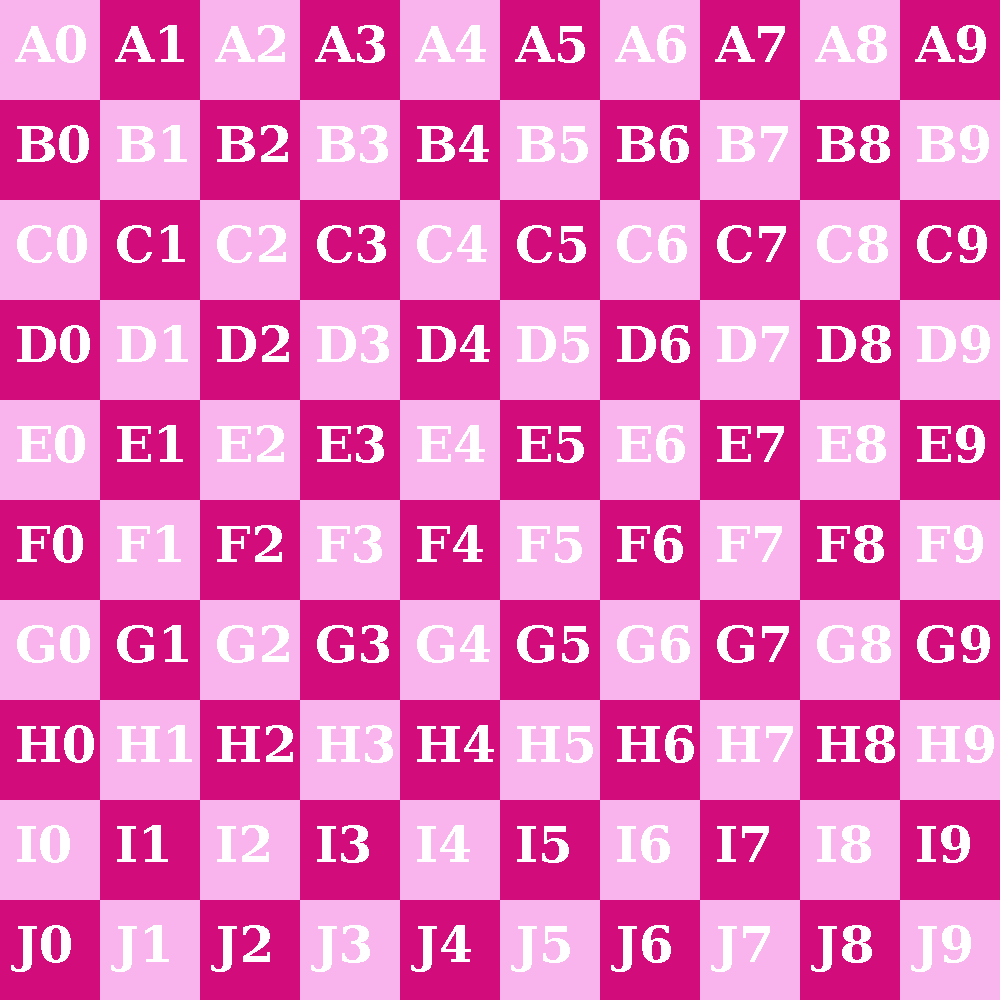

In [6]:
img

In [7]:
arr.shape

(1000, 1000, 3)

In [8]:
arr[0]

array([[249, 180, 237],
       [249, 180, 237],
       [249, 180, 237],
       ...,
       [211,  12, 123],
       [211,  12, 123],
       [211,  12, 123]], dtype=uint8)

In [9]:
np.unique(arr)

array([ 12, 123, 180, 211, 237, 249, 255], dtype=uint8)

Remember: a "color" for us is an RGB triple. What `np.unique(arr)` does is look at all of the integers that show up in `arr`. We want RGB triples instead.

In [14]:
B = arr.reshape(-1,3)

In [15]:
B

array([[249, 180, 237],
       [249, 180, 237],
       [249, 180, 237],
       ...,
       [249, 180, 237],
       [249, 180, 237],
       [249, 180, 237]], dtype=uint8)

In [16]:
np.unique(B)

array([ 12, 123, 180, 211, 237, 249, 255], dtype=uint8)

This is the same problem as before. How can we fix it?

In [17]:
np.unique(B,axis=0)

array([[211,  12, 123],
       [249, 180, 237],
       [255, 255, 255]], dtype=uint8)

We get exactly three colors here!

In [18]:
C = np.unique(B, axis=0)

In [19]:
C.shape

(3, 3)

In [20]:
C

array([[211,  12, 123],
       [249, 180, 237],
       [255, 255, 255]], dtype=uint8)

RGB values range from 0-255 $2^8$ choices for each channel.

Q: Where do the colors change?

In [21]:
arr[0]

array([[249, 180, 237],
       [249, 180, 237],
       [249, 180, 237],
       ...,
       [211,  12, 123],
       [211,  12, 123],
       [211,  12, 123]], dtype=uint8)

In [22]:
arr[0].shape

(1000, 3)

In [23]:
arr[0] == [211,  12, 123]

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

I want to check that every value in the row matches the color `[211,12,123]`.

In [27]:
bm = (arr[0] == [211,  12, 123]).all(axis=1)

In [28]:
bm

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
bm.shape

(1000,)

In [32]:
help(np.nonzero)

Help on function nonzero in module numpy:

nonzero(a)
    Return the indices of the elements that are non-zero.
    
    Returns a tuple of arrays, one for each dimension of `a`,
    containing the indices of the non-zero elements in that
    dimension. The values in `a` are always tested and returned in
    row-major, C-style order.
    
    To group the indices by element, rather than dimension, use `argwhere`,
    which returns a row for each non-zero element.
    
    .. note::
    
       When called on a zero-d array or scalar, ``nonzero(a)`` is treated
       as ``nonzero(atleast_1d(a))``.
    
       .. deprecated:: 1.17.0
    
          Use `atleast_1d` explicitly if this behavior is deliberate.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    tuple_of_arrays : tuple
        Indices of elements that are non-zero.
    
    See Also
    --------
    flatnonzero :
        Return indices that are non-zero in the flattened 

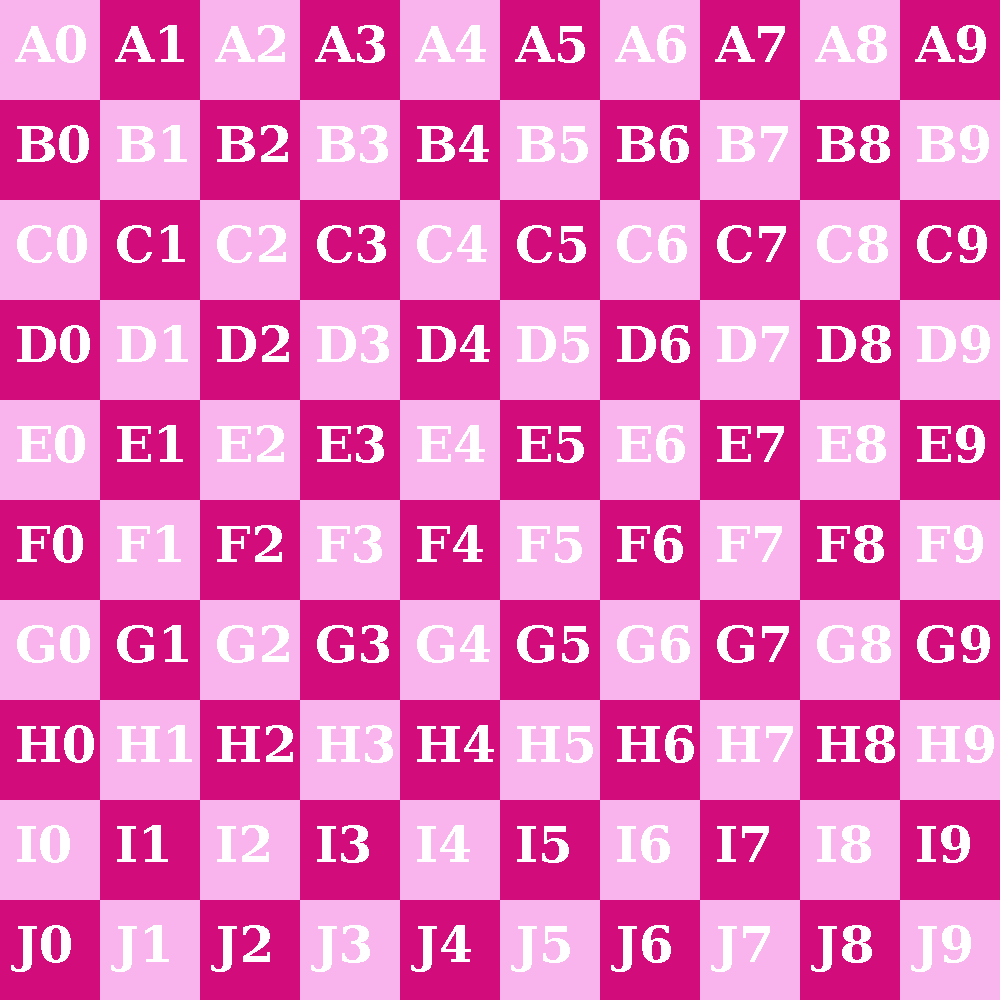

In [33]:
img

In [34]:
inds = np.nonzero(bm)[0]

Notice, the image switches from a different color to dark pink when an index is included, but not index-1.

In [35]:
[x for x in inds if x-1 not in inds]

[100, 300, 500, 700, 900]

## Changing Colors: Boolean Mask

__Goal:__ Replace all `[255,255,255]` triples with `[160,234,222]` using a boolean mask.

In [36]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

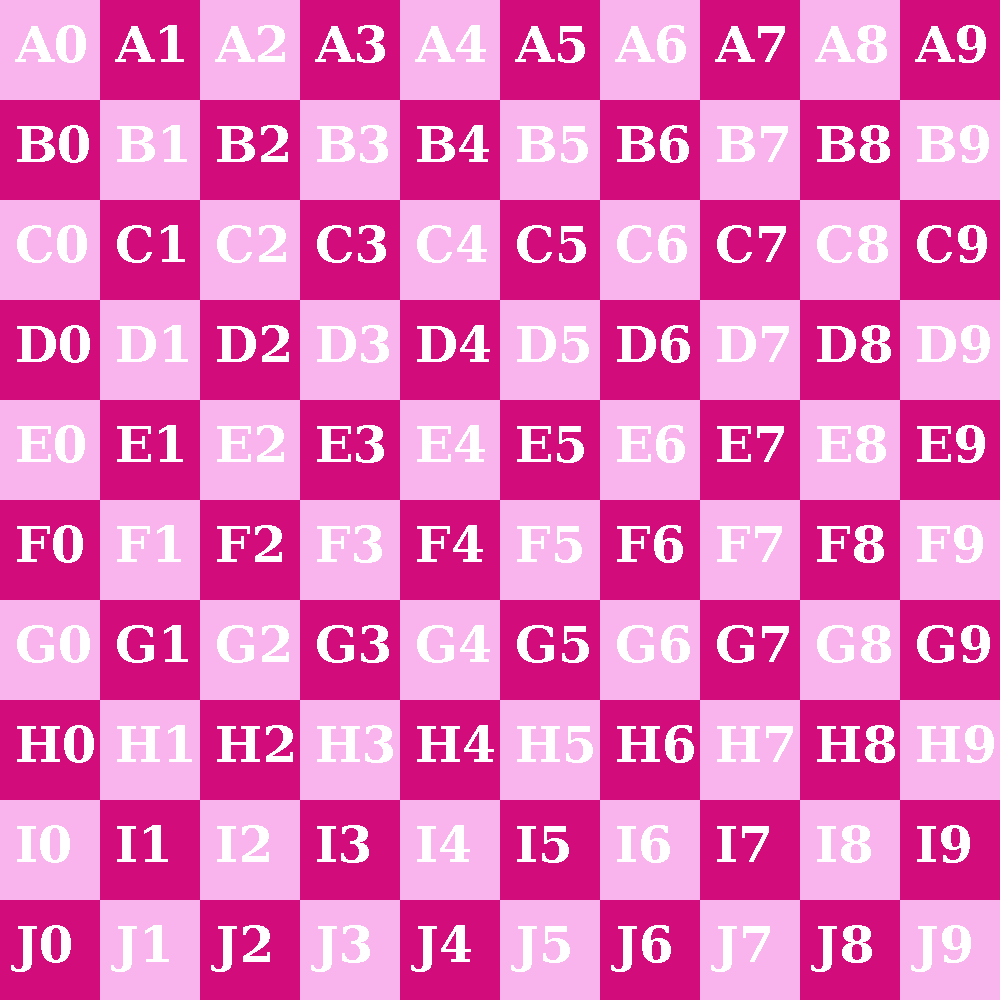

In [37]:
img

In [39]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

Let's start by refreshing on how boolean masking works.

In [40]:
A > 5

array([ True, False, False, False, False, False, False, False, False,
        True, False,  True])

To get just the elements of `A` that are larger than 5:

In [41]:
A[A > 5]

array([ 9, 10,  8])

In [42]:
A.shape

(12,)

Let's reshape `A` to a 3-dimensional array so that we can practice on something more like an image.

In [43]:
B = A.reshape((2,3,2))

In [44]:
B

array([[[ 9,  2],
        [ 4,  5],
        [ 1,  1]],

       [[ 1,  0],
        [ 2, 10],
        [ 5,  8]]])

Say I wanted to sum up `[9,2]`, `[4,5]`, etc.

In [45]:
B.sum(axis=2)

array([[11,  9,  2],
       [ 1, 12, 13]])

In [46]:
B.sum(axis=2).shape

(2, 3)

In [47]:
B.sum(axis=2) > 5

array([[ True,  True, False],
       [False,  True,  True]])

In [49]:
B

array([[[ 9,  2],
        [ 4,  5],
        [ 1,  1]],

       [[ 1,  0],
        [ 2, 10],
        [ 5,  8]]])

In [51]:
B.shape

(2, 3, 2)

In [48]:
B[B.sum(axis=2)>5]

array([[ 9,  2],
       [ 4,  5],
       [ 2, 10],
       [ 5,  8]])

In [50]:
B[B.sum(axis=2)>5].shape

(4, 2)

In [52]:
B[B.sum(axis=2)>5] = [-9,10]

In [53]:
B

array([[[-9, 10],
        [-9, 10],
        [ 1,  1]],

       [[ 1,  0],
        [-9, 10],
        [-9, 10]]])

In [54]:
B.shape

(2, 3, 2)

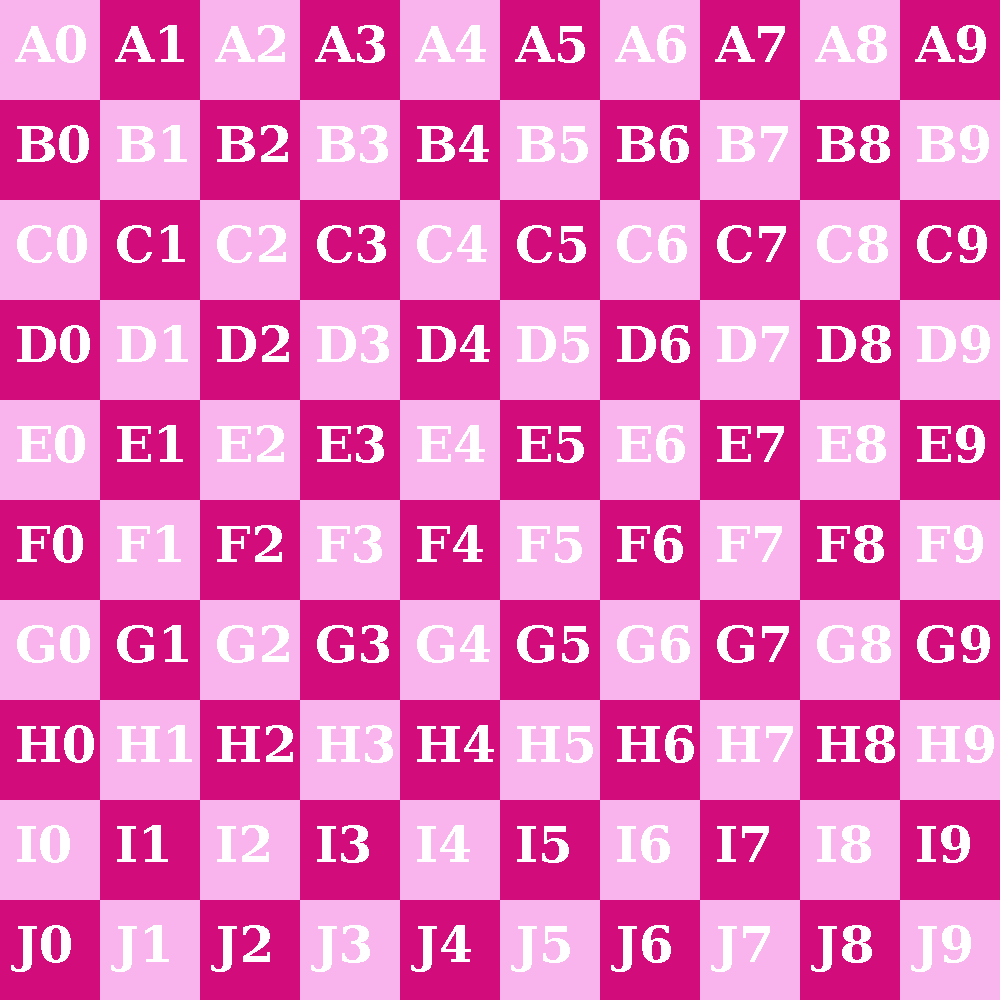

In [55]:
img

In [56]:
arr == [255,255,255]

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [57]:
(arr == [255,255,255]).all(axis=2)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [58]:
arr[(arr == [255,255,255]).all(axis=2)]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [59]:
arr[(arr == [255,255,255]).all(axis=2)].shape

(112790, 3)

There will be a small mistake! Can you catch it?

In [60]:
arr[(arr == [255,255,255]).all(axis=2)] = [160,234,222]

ValueError: assignment destination is read-only

In [61]:
C = arr.copy()

In [62]:
C[(C == [255,255,255]).all(axis=2)] = [160,234,222]

Now, let's take a look!

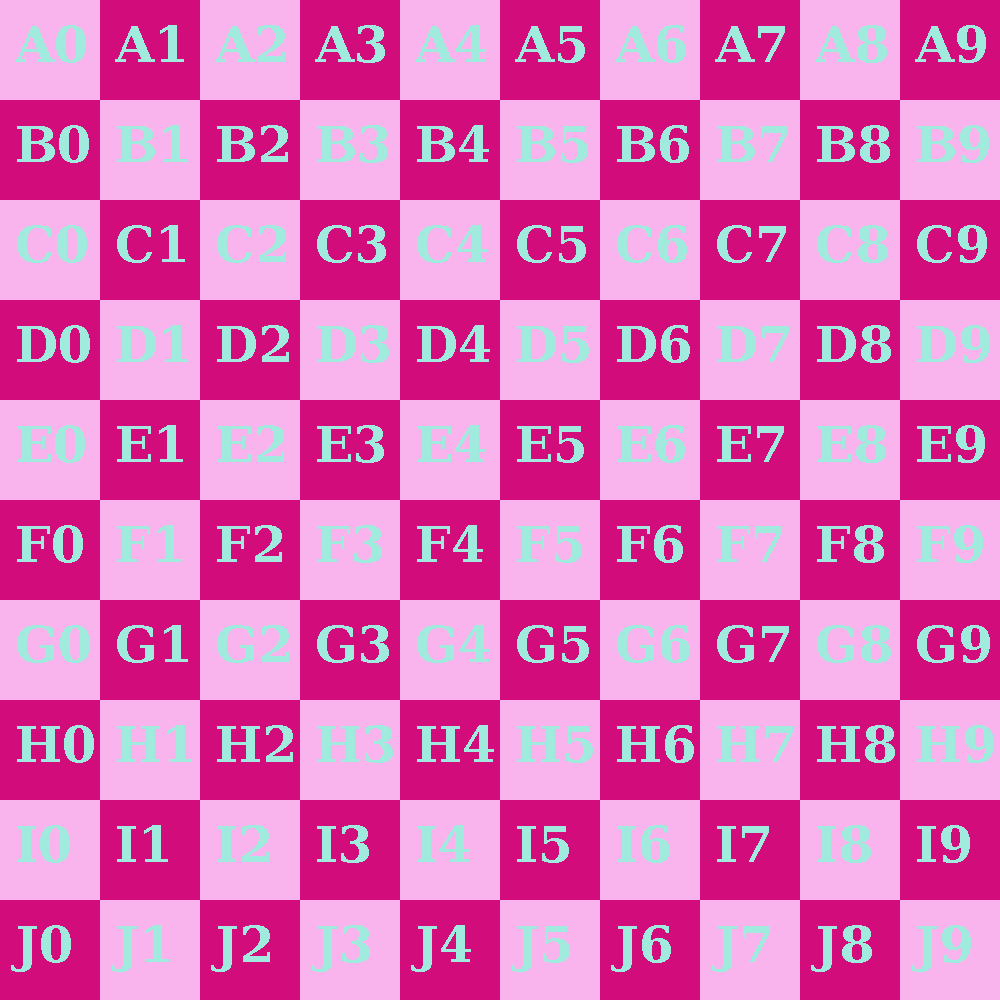

In [63]:
Image.fromarray(C)

In [70]:
C = arr.copy()
C[(C == [255,255,255]).all(axis=2)] = [249, 237, 204]

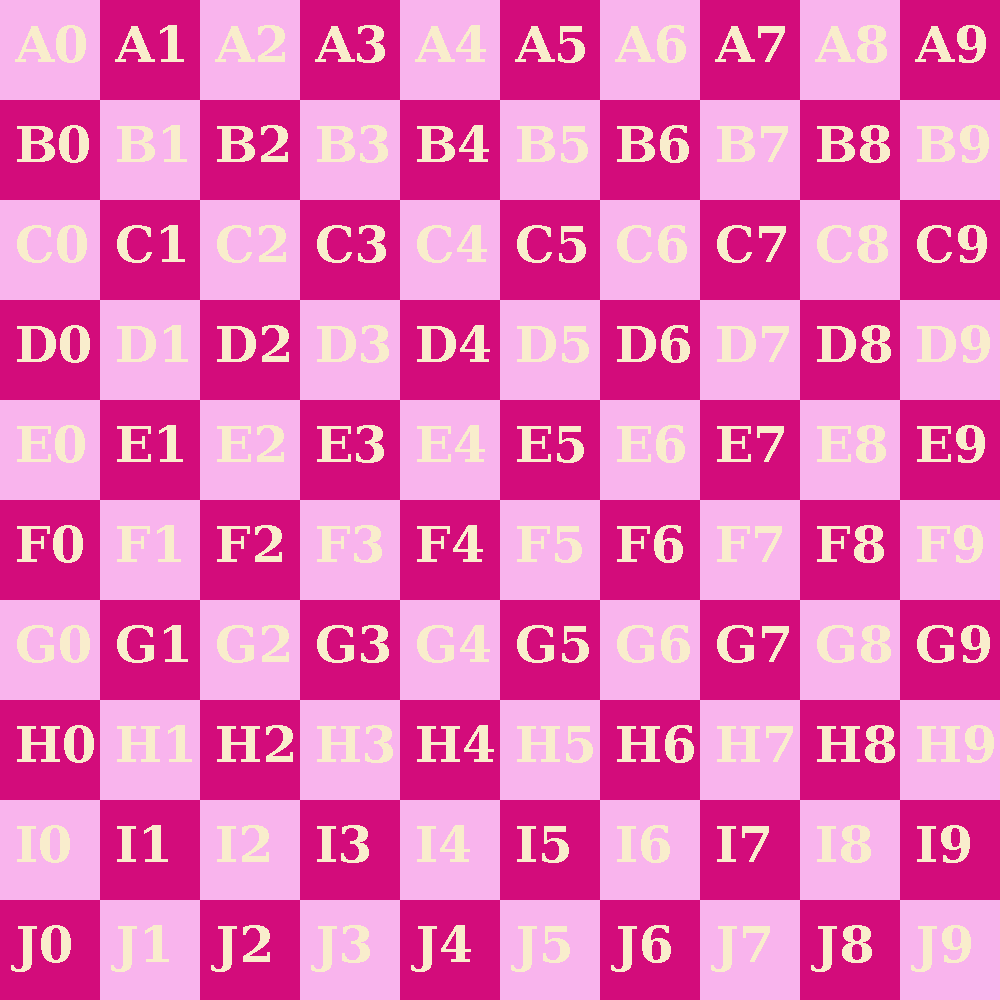

In [71]:
Image.fromarray(C)

## Changing colors using `np.where`

__Goal:__ Replace all square background colors with random colors.

In [72]:
img = Image.open("images/barbie-grid.png")
arr = np.asarray(img)

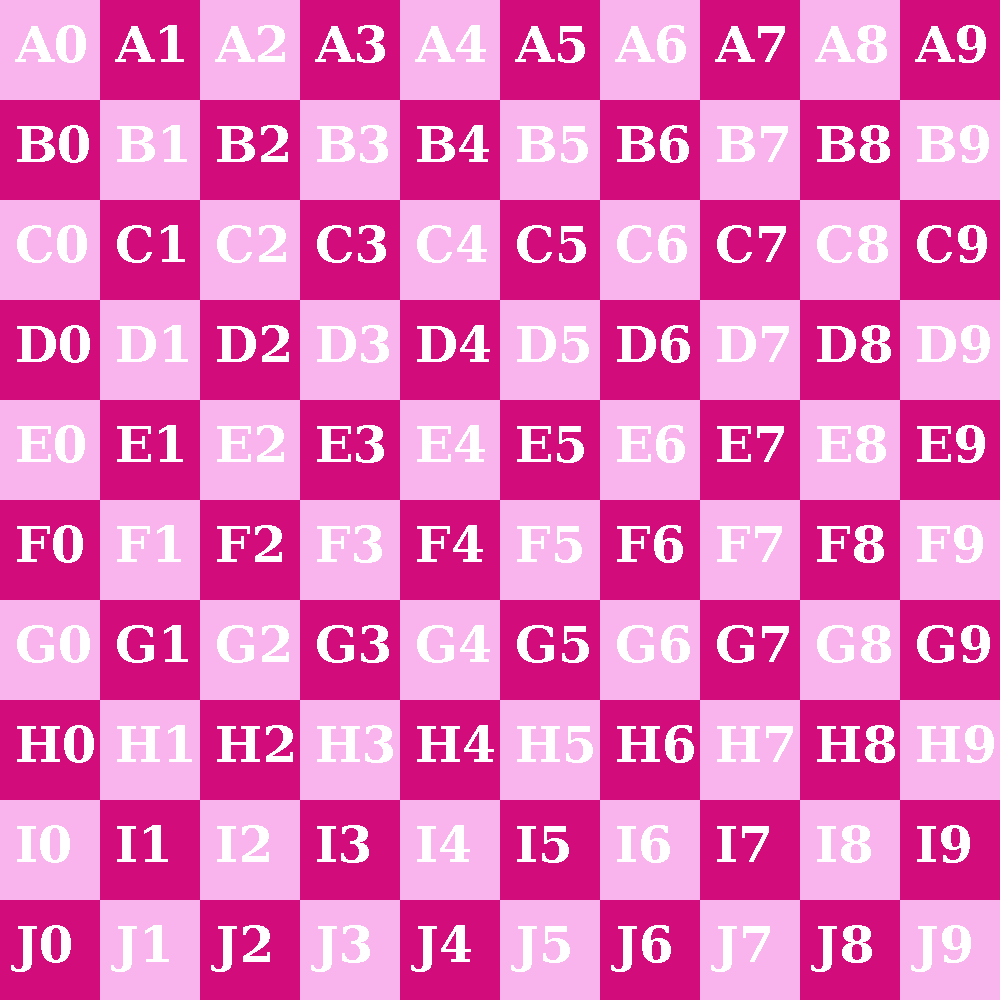

In [73]:
img

In [74]:
A = np.array([9,2,4,5,1,1,1,0,2,10,5,8])

Notice, lots of functionality! I can specify what happens in both True and False cases.

In [75]:
np.where(A > 5, -20, 3)

array([-20,   3,   3,   3,   3,   3,   3,   3,   3, -20,   3, -20])

-20 and 3 could really be anything I want, so long as it's broadcastable to A.

In [76]:
np.where(A > 5, A, 3)

array([ 9,  3,  3,  3,  3,  3,  3,  3,  3, 10,  3,  8])

In [77]:
np.where(A > 5, 100*A, 3)

array([ 900,    3,    3,    3,    3,    3,    3,    3,    3, 1000,    3,
        800])

In [78]:
np.arange(len(A))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [80]:
np.where(A > 5, 100*A, np.arange(len(A)))

array([ 900,    1,    2,    3,    4,    5,    6,    7,    8, 1000,   10,
        800])

In [83]:
mask = (arr == [255,255,255]).all(axis=2)

I'm going to make an error!

In [84]:
mask.shape

(1000, 1000)

In [85]:
arr.shape

(1000, 1000, 3)

In [86]:
np.where(mask, arr, arr)

ValueError: operands could not be broadcast together with shapes (1000,1000) (1000,1000,3) (1000,1000,3) 

This is an issue with broadcasting. Our mask has only 2 dimensions, but we can easily increase it to 3.

In [87]:
mask = (arr == [255,255,255]).all(axis=2).reshape(1000,1000,1)

Now let's try to get random colors.

In [89]:
rng = np.random.default_rng()

In [90]:
colors = rng.integers(256,size=(100,100,3),dtype=np.uint8)

Notice! There's still an issue!

In [92]:
np.where(mask,arr,colors)

ValueError: operands could not be broadcast together with shapes (1000,1000,1) (1000,1000,3) (100,100,3) 

We need to "repeat" the colors and stretch them to the correct size.

In [93]:
Y = colors.repeat(10,axis=0).repeat(10,axis=1)

In [95]:
arr2 = np.where(mask, arr, Y)

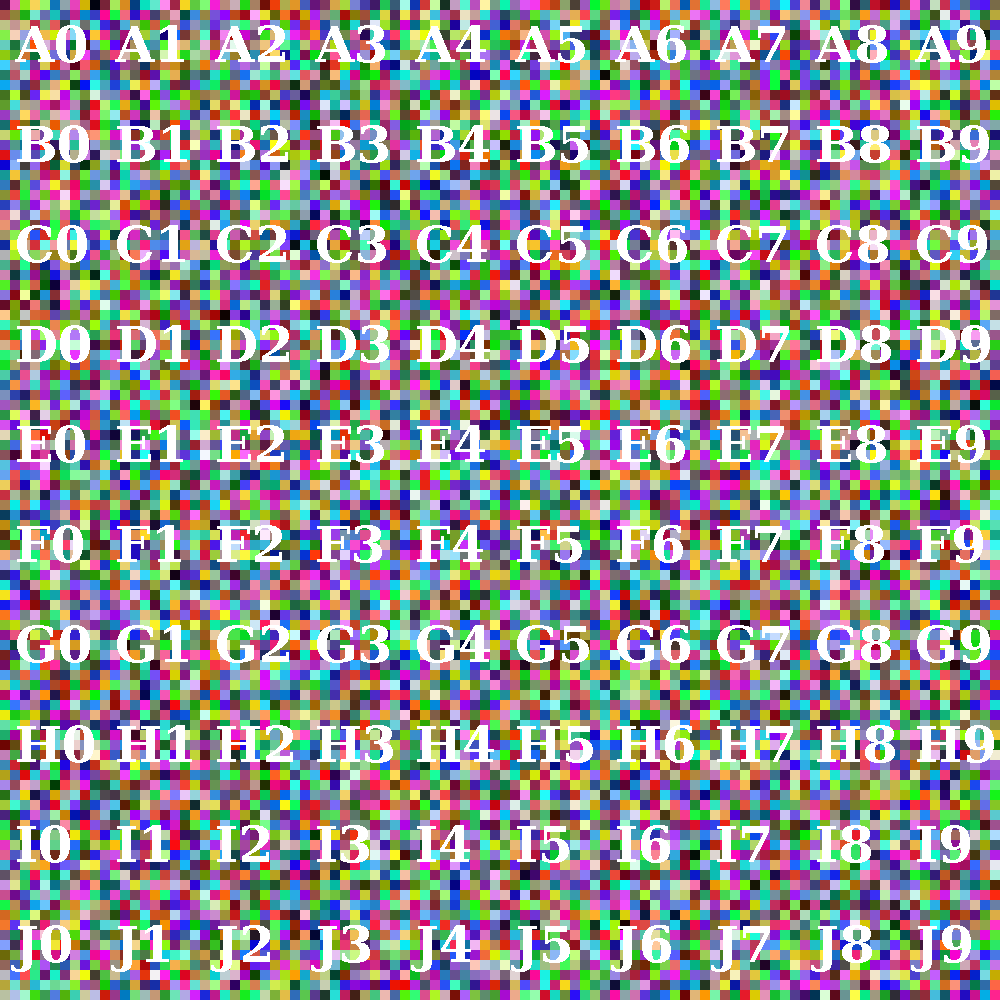

In [96]:
Image.fromarray(arr2)

Let's try to change just the big squares from the original image.

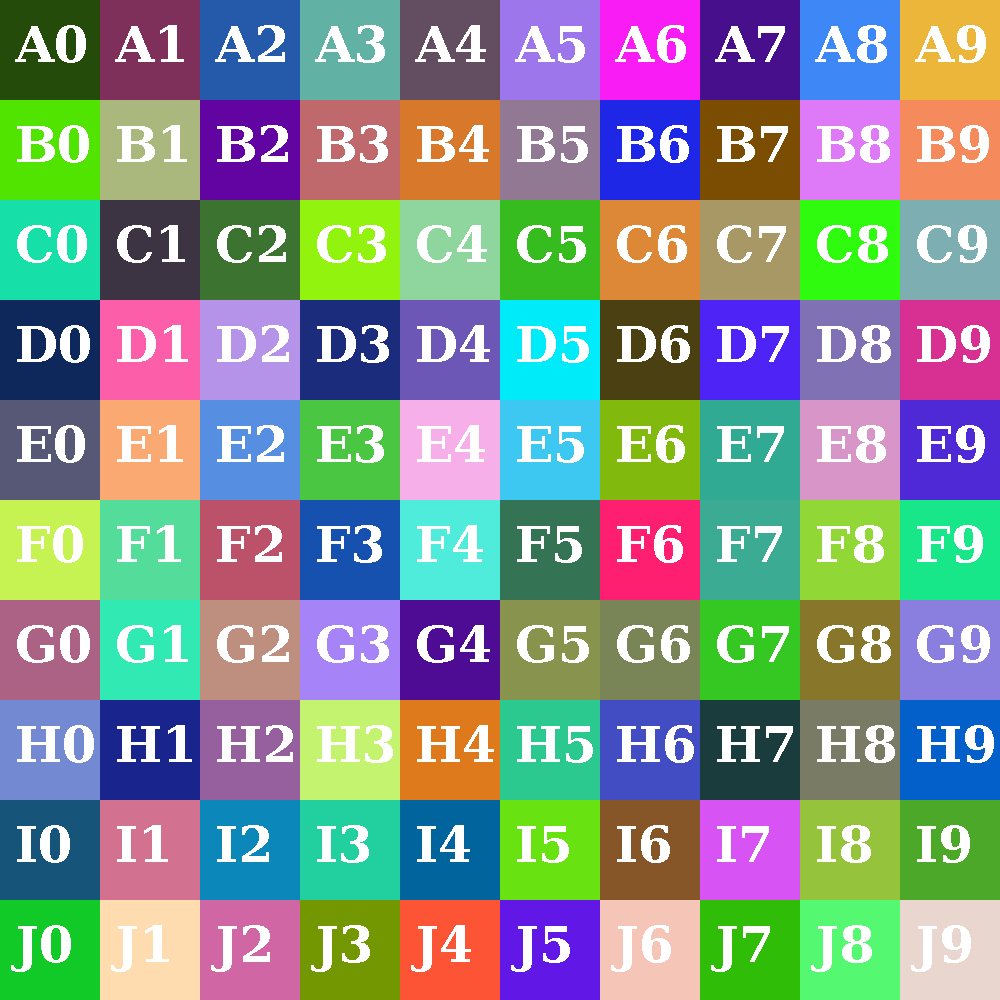

In [109]:
colors = rng.integers(256,size=(10,10,3),dtype=np.uint8)
Y = colors.repeat(100,axis=0).repeat(100,axis=1)
arr3 = np.where(mask, arr, Y)
Image.fromarray(arr3)

I call this next one "TV Static"

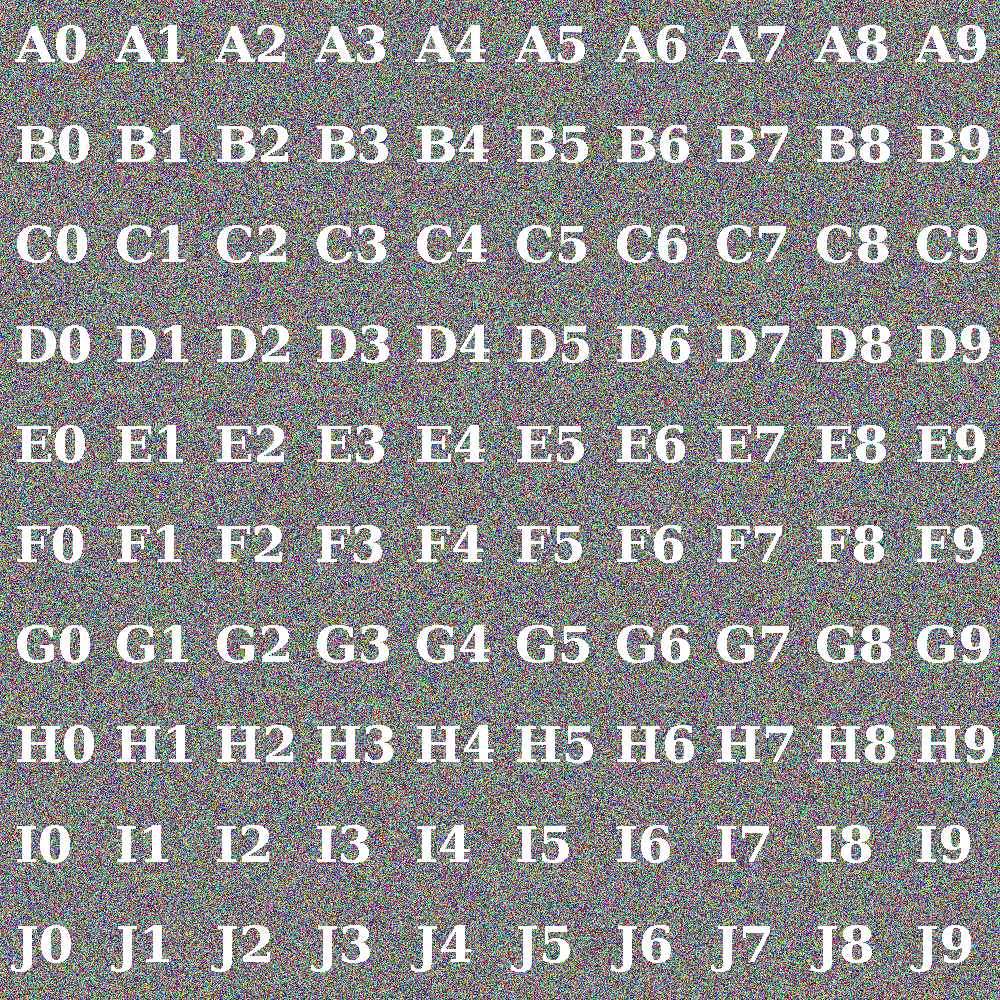

In [111]:
colors = rng.integers(256, size=(1000,1000,3),dtype=np.uint8)
arr4 = np.where(mask, arr, colors)
Image.fromarray(arr4)

## Bonus: How did Yasmeen make the square grid?

In [112]:
from PIL import Image
import numpy as np
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont
from itertools import product
import string

In [113]:
font = ImageFont.truetype(r"fonts/OptimusPrincepsSemiBold.ttf",50)

This should be familiar from our lecture on creating an image :)

In [114]:
rep = np.array([[[249,180,237],[211,12,123]],[[211,12,123],[249,180,237]]],dtype=np.uint8)

In [118]:
img = Image.fromarray(rep).resize((200,200),Image.Resampling.BOX)

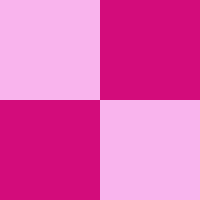

In [119]:
img

In [120]:
arr = np.asarray(img)

In [121]:
arr.shape

(200, 200, 3)

I know I want my final image to be 1000 by 1000 pixels, so this array will be a placeholder.

In [122]:
temp = np.zeros((1000,1000,3),dtype=np.uint8)

Fill in the array with repeats of my 200 by 200 square. 

In [123]:
for i,j in product(range(0,900,200),repeat=2):
        temp[i:i+200,j:j+200] = arr

In [124]:
img = Image.fromarray(temp)

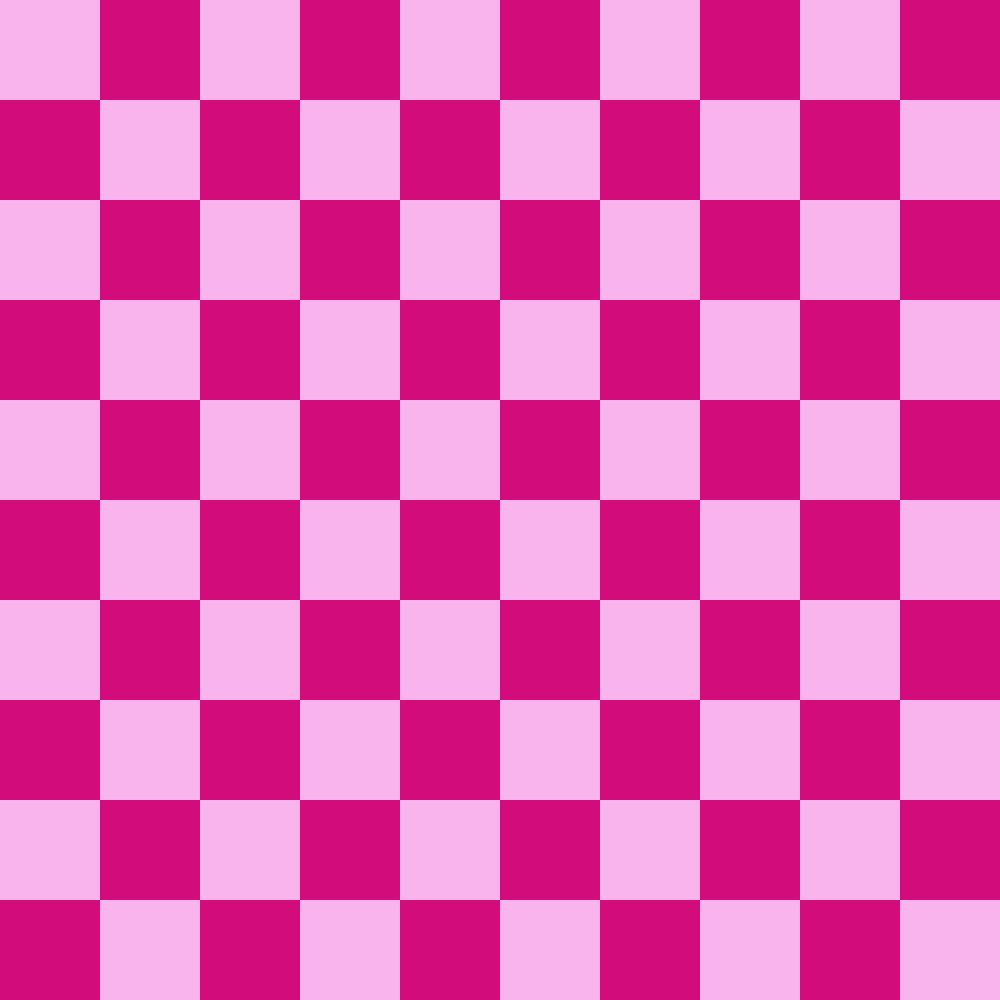

In [125]:
img

In [134]:
img = Image.fromarray(temp)
centers = product(range(15,1000,100),repeat=2)
alph = product(range(10),string.ascii_uppercase[:10])
Im = ImageDraw.Draw(img)
Im.fontmode = "1" #disable antialiasing, "L" to enable
for coord,k in zip(centers,alph):
        Im.text(coord, f"{k[1]}{k[0]}", fill=(255,255,255), font = font)


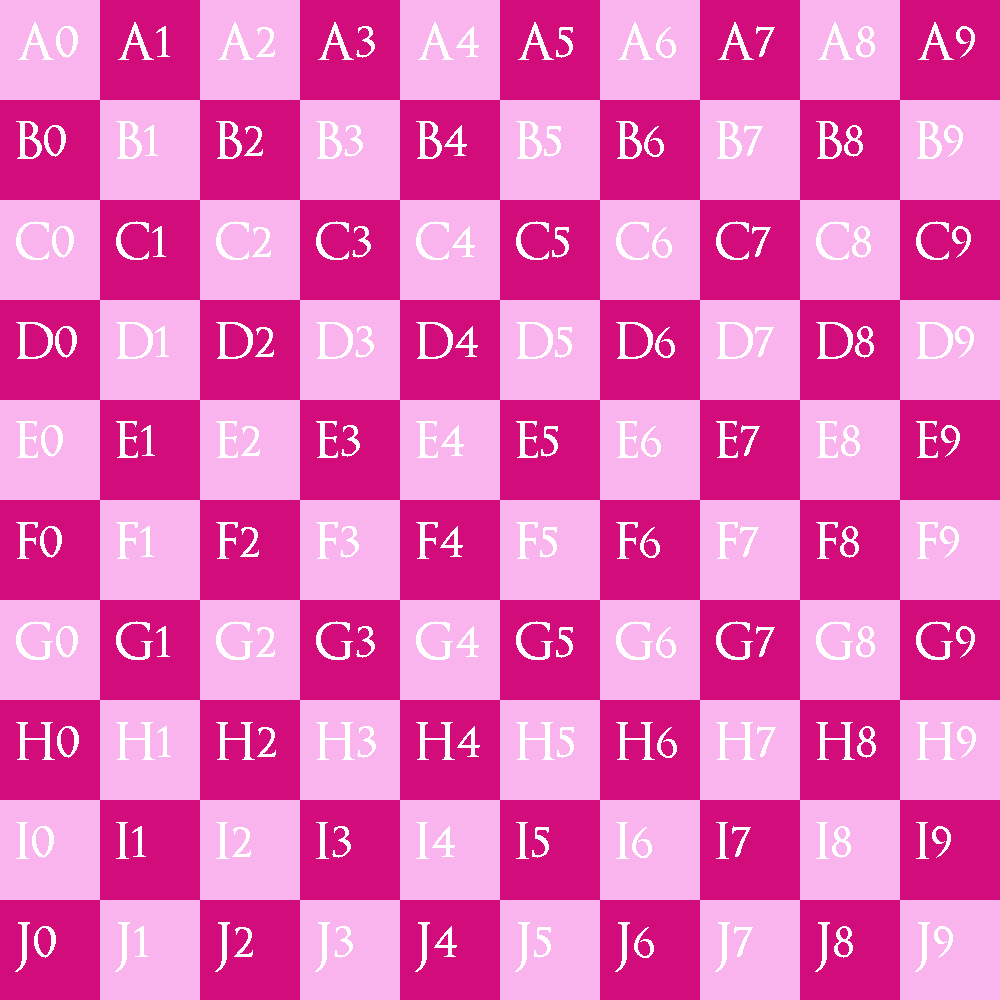

In [135]:
img

In [37]:
help(Im.text)

Help on method text in module PIL.ImageDraw:

text(xy, text, fill=None, font=None, anchor=None, spacing=4, align='left', direction=None, features=None, language=None, stroke_width=0, stroke_fill=None, embedded_color=False, *args, **kwargs) method of PIL.ImageDraw.ImageDraw instance



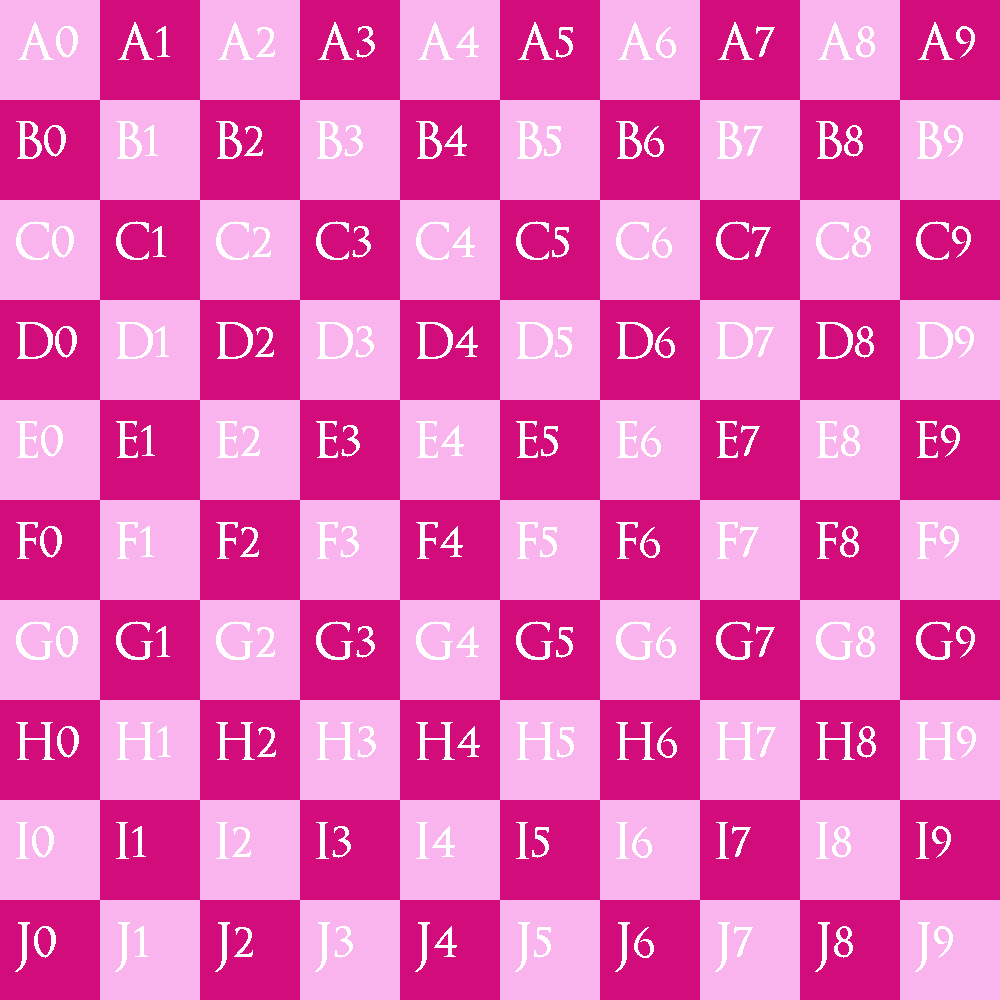

In [136]:
img

In [137]:
arr2 = np.asarray(img)

In [138]:
np.unique(arr2.reshape(-1,3),axis=0).shape

(3, 3)

In [57]:
np.unique(arr.reshape(-1,3),axis=0).shape

(2, 3)

In [58]:
img.save("images/soulsbarbie-grid.png")